<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Normalization Techniques**


Estimated time needed: **30** minutes


In this lab, you will focus on data normalization. This includes identifying compensation-related columns, applying normalization techniques, and visualizing the data distributions.


## Objectives


In this lab, you will perform the following:


- Identify duplicate rows and remove them.

- Check and handle missing values in key columns.

- Identify and normalize compensation-related columns.

- Visualize the effect of normalization techniques on data distributions.


-----


## Hands on Lab


#### Step 1: Install and Import Libraries


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Load the Dataset into a DataFrame


We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.


The functions below will download the dataset into your browser:


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

# Display the first few rows to check if data is loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

### Section 1: Handling Duplicates
##### Task 1: Identify and remove duplicate rows.


In [5]:
#totla count of duplicate
count_duplicate = df.duplicated().sum()
count_duplicate

np.int64(0)

In [6]:
#df with duplicates
df_duplicate = df[df.duplicated()]
df_duplicate.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat


✨No duplicates !Already removed !✨

### Section 2: Handling Missing Values
##### Task 2: Identify missing values in `CodingActivities`.


In [8]:
coding_nan = df['CodingActivities'].isna().sum()
coding_nan

np.int64(10971)

##### Task 3: Impute missing values in CodingActivities with forward-fill.


💡Refer to : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna

method{‘backfill’, ‘bfill’, ‘ffill’, None}, default None

Method to use for filling holes in reindexed Series:

ffill: propagate last valid observation forward to next valid.

backfill / bfill: use next valid observation to fill gap.

In [9]:
df['CodingActivites'] = df['CodingActivities'].fillna(method ='ffill')
#check for missing value after replacement
print(df['CodingActivites'].isna().sum())

0


/tmp/ipykernel_3171/2146724933.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CodingActivites'] = df['CodingActivities'].fillna(method ='ffill')


**Note**:  Before normalizing ConvertedCompYearly, ensure that any missing values (NaN) in this column are handled appropriately. You can choose to either drop the rows containing NaN or replace the missing values with a suitable statistic (e.g., median or mean).


### Section 3: Normalizing Compensation Data
##### Task 4: Identify compensation-related columns, such as ConvertedCompYearly.
Normalization is commonly applied to compensation data to bring values within a comparable range. Here, you’ll identify ConvertedCompYearly or similar columns, which contain compensation information. This column will be used in the subsequent tasks for normalization.


In [10]:
#check for NaN
conv_comp_yearly_nan = df['ConvertedCompYearly'].isna().sum()
conv_comp_yearly_nan

np.int64(42002)

🪥Clean the NaN before Normalization

In [27]:
average_comp_yearly = df['ConvertedCompYearly'].mean()
average_comp_yearly

np.float64(86155.28726264134)

In [28]:
df['ConvertedCompYearly']=df['ConvertedCompYearly'].fillna(average_comp_yearly)
#check for missing value after replacement
print(df['ConvertedCompYearly'].isna().sum())

0


##### Task 5: Normalize ConvertedCompYearly using Min-Max Scaling.
Min-Max Scaling brings all values in a column to a 0-1 range, making it useful for comparing data across different scales. Here, you will apply Min-Max normalization to the ConvertedCompYearly column, creating a new column ConvertedCompYearly_MinMax with normalized values.


In [29]:
conv_min = df['ConvertedCompYearly'].min()
conv_max = df['ConvertedCompYearly'].max()
df['ConvertedCompYearly_MinMax'] = (df['ConvertedCompYearly']-conv_min)/(conv_max-conv_min)

In [30]:
#check the normalization
print(df['ConvertedCompYearly_MinMax'].min())  # Devrait afficher 0
print(df['ConvertedCompYearly_MinMax'].max())  # Devrait afficher 1

0.0
1.0


##### Task 6: Apply Z-score Normalization to `ConvertedCompYearly`.

Z-score normalization standardizes values by converting them to a distribution with a mean of 0 and a standard deviation of 1. This method is helpful for datasets with a Gaussian (normal) distribution. Here, you’ll calculate Z-scores for the ConvertedCompYearly column, saving the results in a new column ConvertedCompYearly_Zscore.


In [31]:
conv_mean = df['ConvertedCompYearly'].mean()
conv_sigma = df['ConvertedCompYearly'].std()
df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly']-conv_mean)/conv_sigma

In [32]:
#check the normalization
print(df['ConvertedCompYearly_Zscore'].mean())  #doit etre proche de 0
print(df['ConvertedCompYearly_Zscore'].std())  # doit etre proche de 1

1.3895186296656397e-16
1.0


### Section 4: Visualization of Normalized Data
##### Task 7: Visualize the distribution of `ConvertedCompYearly`, `ConvertedCompYearly_MinMax`, and `ConvertedCompYearly_Zscore`

Visualization helps you understand how normalization changes the data distribution. In this task, create histograms for the original ConvertedCompYearly, as well as its normalized versions (ConvertedCompYearly_MinMax and ConvertedCompYearly_Zscore). This will help you compare how each normalization technique affects the data range and distribution.


In [33]:
#check the distributions to optimize visualization in histograms
df[['ConvertedCompYearly','ConvertedCompYearly_MinMax','ConvertedCompYearly_Zscore']].describe()

,ConvertedCompYearly,ConvertedCompYearly_MinMax,ConvertedCompYearly_Zscore
count,6.543700e+04,65437.000000,6.543700e+04
mean,8.615529e+04,0.005300,1.389519e-16
std,1.117614e+05,0.006875,1.000000e+00
min,1.000000e+00,0.000000,-7.708772e-01
25%,8.615529e+04,0.005300,1.302052e-16
50%,8.615529e+04,0.005300,1.302052e-16
75%,8.615529e+04,0.005300,1.302052e-16
max,1.625660e+07,1.000000,1.446873e+02


🔍boxplot to visualize distribution of data to optimize histograms

/tmp/ipykernel_3171/3410918968.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_plot_original, patch_artist=True, labels=['Original'])


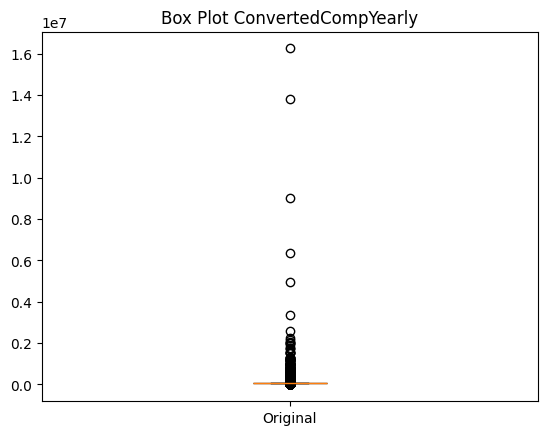

In [59]:
box_plot_original = df['ConvertedCompYearly']
plt.boxplot(box_plot_original, patch_artist=True, labels=['Original'])
plt.title('Box Plot ConvertedCompYearly')
plt.show()

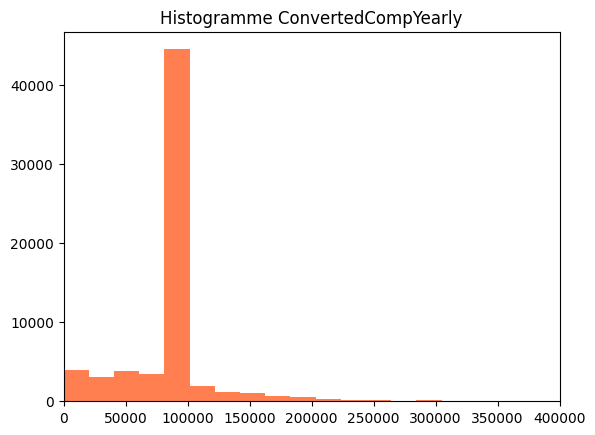

In [86]:
plt.hist(df['ConvertedCompYearly'], bins=800, color='coral')
plt.title('Histogramme ConvertedCompYearly')
plt.xlim([0,0.4e6])
plt.show()


/tmp/ipykernel_3171/1430469771.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_plot_Z, patch_artist=True, labels=['Zscore'])


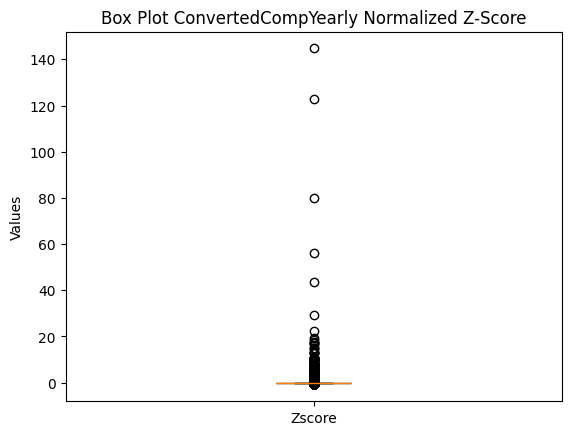

In [61]:
box_plot_Z=df['ConvertedCompYearly_Zscore']
# Créer un boxplot pour toutes les colonnes
plt.boxplot(box_plot_Z, patch_artist=True, labels=['Zscore'])

# Ajouter le titre et personnaliser
plt.title('Box Plot ConvertedCompYearly Normalized Z-Score')
plt.ylabel('Values')
plt.show()

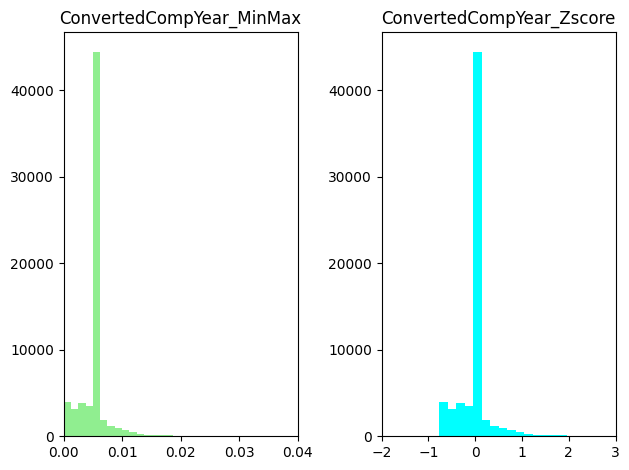

In [82]:
import numpy as np
#histograms
fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True)

dist2 =df['ConvertedCompYearly_MinMax']
dist3 =df['ConvertedCompYearly_Zscore']

bins2 =np.histogram_bin_edges(df['ConvertedCompYearly_MinMax'], bins='auto')
bins3 =np.histogram_bin_edges(df['ConvertedCompYearly_Zscore'], bins='auto')
# We can set the number of bins 
axs[0].hist(dist2, bins=800, color = 'lightgreen')
axs[1].hist(dist3, bins=800, color = 'aqua')
axs[0].set_title('ConvertedCompYear_MinMax')
axs[0].set_xlim([0, 0.04])
axs[1].set_title('ConvertedCompYear_Zscore')
axs[1].set_xlim([-2, 3])
plt.show()

### Summary


In this lab, you practiced essential normalization techniques, including:

- Identifying and handling duplicate rows.

- Checking for and imputing missing values.

- Applying Min-Max scaling and Z-score normalization to compensation data.

- Visualizing the impact of normalization on data distribution.


Copyright © IBM Corporation. All rights reserved.
